# Task 2

Task 2.2
#reading the csv file

In [ ]:
import pandas as pd
df = pd.read_csv('AAPL.csv')

Task 2.3

adding day_of_week column


In [17]:
df['Date'] = pd.to_datetime(df['Date'])
df['day_of_week'] = df['Date'].dt.weekday_name
df.head()



,Date,Open,High,Low,Close,Adj Close,Volume,day_of_week
0,2012-12-31,72.932854,76.485718,72.714287,76.024284,54.395519,164873100,Monday
1,2013-01-02,79.117142,79.285713,77.375717,78.432854,56.118870,140129500,Wednesday
2,2013-01-03,78.268570,78.524284,77.285713,77.442856,55.410530,88241300,Thursday
3,2013-01-04,76.709999,76.947144,75.118568,75.285713,53.867073,148583400,Friday
4,2013-01-07,74.571426,75.614288,73.599998,74.842857,53.550209,121039100,Monday


Parsing a column to be a "date" and "index" type should happen while reading a csv file.

so we will save our updates and read the file again.

In [19]:
#saving it to new csv file 
df.to_csv('newAAPl.csv')

df = pd.read_csv('newAAPl.csv', header=0, index_col='Date', parse_dates=True)
df.head()

,Unnamed: 0,Open,High,Low,Close,Adj Close,Volume,day_of_week
Date,,,,,,,,
2012-12-31,0,72.932854,76.485718,72.714287,76.024284,54.395519,164873100,Monday
2013-01-02,1,79.117142,79.285713,77.375717,78.432854,56.118870,140129500,Wednesday
2013-01-03,2,78.268570,78.524284,77.285713,77.442856,55.410530,88241300,Thursday
2013-01-04,3,76.709999,76.947144,75.118568,75.285713,53.867073,148583400,Friday
2013-01-07,4,74.571426,75.614288,73.599998,74.842857,53.550209,121039100,Monday


In [20]:
#drop "Unnamed: 0" column
df.drop('Unnamed: 0', axis = 1, inplace = True)
df.head()

,Open,High,Low,Close,Adj Close,Volume,day_of_week
Date,,,,,,,
2012-12-31,72.932854,76.485718,72.714287,76.024284,54.395519,164873100,Monday
2013-01-02,79.117142,79.285713,77.375717,78.432854,56.118870,140129500,Wednesday
2013-01-03,78.268570,78.524284,77.285713,77.442856,55.410530,88241300,Thursday
2013-01-04,76.709999,76.947144,75.118568,75.285713,53.867073,148583400,Friday
2013-01-07,74.571426,75.614288,73.599998,74.842857,53.550209,121039100,Monday


Populating the interactive namespace from numpy and matplotlib


C:\Users\major\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['random', 'fft', 'power', 'linalg', 'info']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


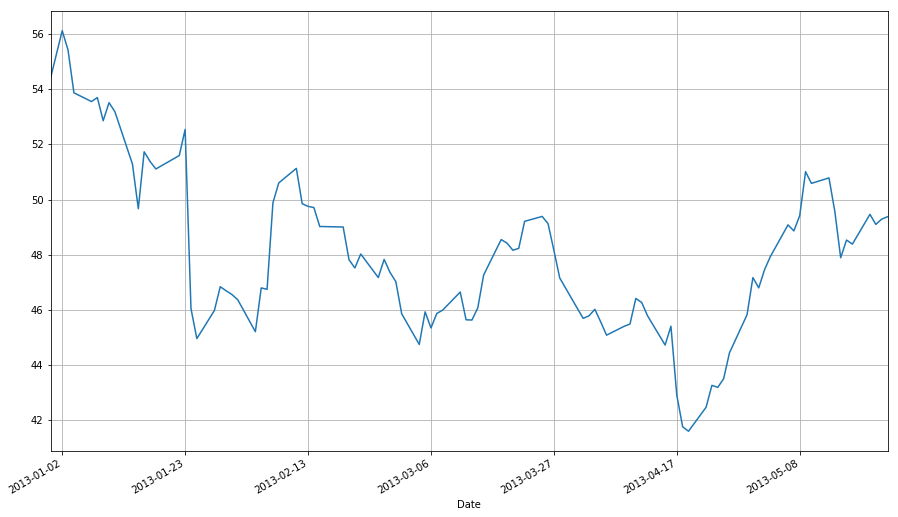

In [21]:
#check that the Date column parsed well 

import pandas as pd
from matplotlib import pylab
from pylab import *

%matplotlib inline


#take a small part of the data to make sure that "Date" parsed correctly
x=df[:100] 

%pylab inline
pylab.rcParams['figure.figsize'] = (15, 9)
# Plot the adjusted closing price of AAPL with only volume of x
x["Adj Close"].plot(grid = True) 

Task 2.4

create a new column "same_day_delta"


In [22]:
diff_close_open=df['Close'] - df['Open']
df['same_day_delta'] = diff_close_open/df['Open'] * 100 
df.head()

,Open,High,Low,Close,Adj Close,Volume,day_of_week,same_day_delta
Date,,,,,,,,
2012-12-31,72.932854,76.485718,72.714287,76.024284,54.395519,164873100,Monday,4.238734
2013-01-02,79.117142,79.285713,77.375717,78.432854,56.118870,140129500,Wednesday,-0.864905
2013-01-03,78.268570,78.524284,77.285713,77.442856,55.410530,88241300,Thursday,-1.054975
2013-01-04,76.709999,76.947144,75.118568,75.285713,53.867073,148583400,Friday,-1.856715
2013-01-07,74.571426,75.614288,73.599998,74.842857,53.550209,121039100,Monday,0.363988


Task 2.5

create a new column same_day_strategy

In [23]:
df['same_day_strategy'] = np.where(df['same_day_delta']>=.5, '1', '0')
df.head()

,Open,High,Low,Close,Adj Close,Volume,day_of_week,same_day_delta,same_day_strategy
Date,,,,,,,,,
2012-12-31,72.932854,76.485718,72.714287,76.024284,54.395519,164873100,Monday,4.238734,1
2013-01-02,79.117142,79.285713,77.375717,78.432854,56.118870,140129500,Wednesday,-0.864905,0
2013-01-03,78.268570,78.524284,77.285713,77.442856,55.410530,88241300,Thursday,-1.054975,0
2013-01-04,76.709999,76.947144,75.118568,75.285713,53.867073,148583400,Friday,-1.856715,0
2013-01-07,74.571426,75.614288,73.599998,74.842857,53.550209,121039100,Monday,0.363988,0


task2.6


create a new columnnext close dalta 

after finding that hard to deal with the first value in "close" column steps will be:


1)create a "previos" column contain the shift of every value in "close" column


2)handel the first value in "previos" column manually by assign it with the"close" column

3)drop "previous" column




In [24]:
df['previous'] = np.roll(df['Close'], 1)
df['previous'][0]='76.024284'


diff_close_previos=df['Close'] - df['previous']
df['next_close_delta'] = diff_close_open/df['Close'] * 100 
df.drop('previous', axis = 1, inplace = True)

df.head()


C:\Users\major\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Open,High,Low,Close,Adj Close,Volume,day_of_week,same_day_delta,same_day_strategy,previous,next_close_delta
Date,,,,,,,,,,,
2012-12-31,72.932854,76.485718,72.714287,76.024284,54.395519,164873100,Monday,4.238734,1,76.024284,4.066372
2013-01-02,79.117142,79.285713,77.375717,78.432854,56.118870,140129500,Wednesday,-0.864905,0,76.024284,-0.872451
2013-01-03,78.268570,78.524284,77.285713,77.442856,55.410530,88241300,Thursday,-1.054975,0,78.432854,-1.066224
2013-01-04,76.709999,76.947144,75.118568,75.285713,53.867073,148583400,Friday,-1.856715,0,77.442856,-1.891841
2013-01-07,74.571426,75.614288,73.599998,74.842857,53.550209,121039100,Monday,0.363988,0,75.285713,0.362668


task2.7


create a new columnnext close next_close_strategy

In [26]:
df['next_close_strategy'] = np.where(df['next_close_delta']>=.5, '1', '0')
df.head()


,Open,High,Low,Close,Adj Close,Volume,day_of_week,same_day_delta,same_day_strategy,next_close_delta,next_close_strategy
Date,,,,,,,,,,,
2012-12-31,72.932854,76.485718,72.714287,76.024284,54.395519,164873100,Monday,4.238734,1,4.066372,1
2013-01-02,79.117142,79.285713,77.375717,78.432854,56.118870,140129500,Wednesday,-0.864905,0,-0.872451,0
2013-01-03,78.268570,78.524284,77.285713,77.442856,55.410530,88241300,Thursday,-1.054975,0,-1.066224,0
2013-01-04,76.709999,76.947144,75.118568,75.285713,53.867073,148583400,Friday,-1.856715,0,-1.891841,0
2013-01-07,74.571426,75.614288,73.599998,74.842857,53.550209,121039100,Monday,0.363988,0,0.362668,0


Task2.8

In [27]:
#average close price per month
average_close=df.groupby(pd.TimeGrouper('M')).Close.mean()
#average_close
average_close.to_csv('AAPl_average_close.csv')


#average open price per month
average_open=df.groupby(pd.TimeGrouper('M')).Close.mean()
#average_open
average_open.to_csv('AAPl_average_open.csv')

#highest close price per month
highest_close=df.groupby(pd.TimeGrouper('M')).Close.max()
#highest_close
average_open.to_csv('AAPl_highest_close.csv')


#lowest open price per month
lowest_open=df.groupby(pd.TimeGrouper('M')).Open.min()
#lowest_open
average_open.to_csv('AAPl_lowest_open.csv')




#higest high and low price per month
higest_high=df.groupby(pd.TimeGrouper('M')).High.max()
#higest_high
average_open.to_csv('AAPl_higest_high.csv')

higest_low=df.groupby(pd.TimeGrouper('M')).Low.max()
#higest_low
average_open.to_csv('AAPl_higest_low.csv')




#lowest high and low price per month
lowest_high=df.groupby(pd.TimeGrouper('M')).High.min()
average_open.to_csv('AAPl_lowest_high.csv')

lowest_low=df.groupby(pd.TimeGrouper('M')).Low.min()
average_open.to_csv('AAPl_lowest_low.csv')

In [29]:
#save data with the final update 

df.to_csv('AAPl_final_update.csv')


Task 2.9

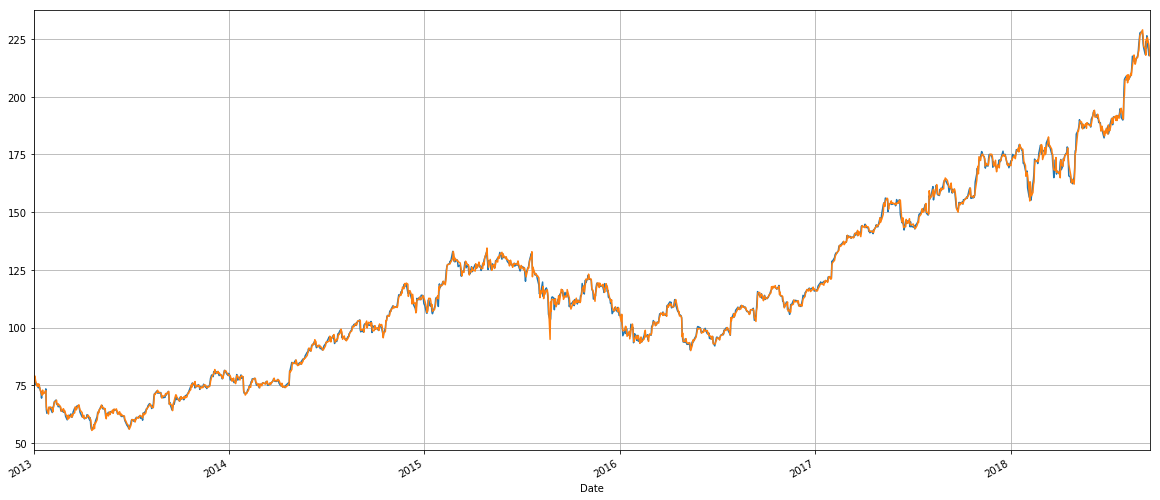

In [30]:
#we will use the first 199 record only

pylab.rcParams['figure.figsize'] = (20, 9)   # Change the size of plots

df['Close'].plot(grid = True) 
df['Open'].plot(grid = True) 

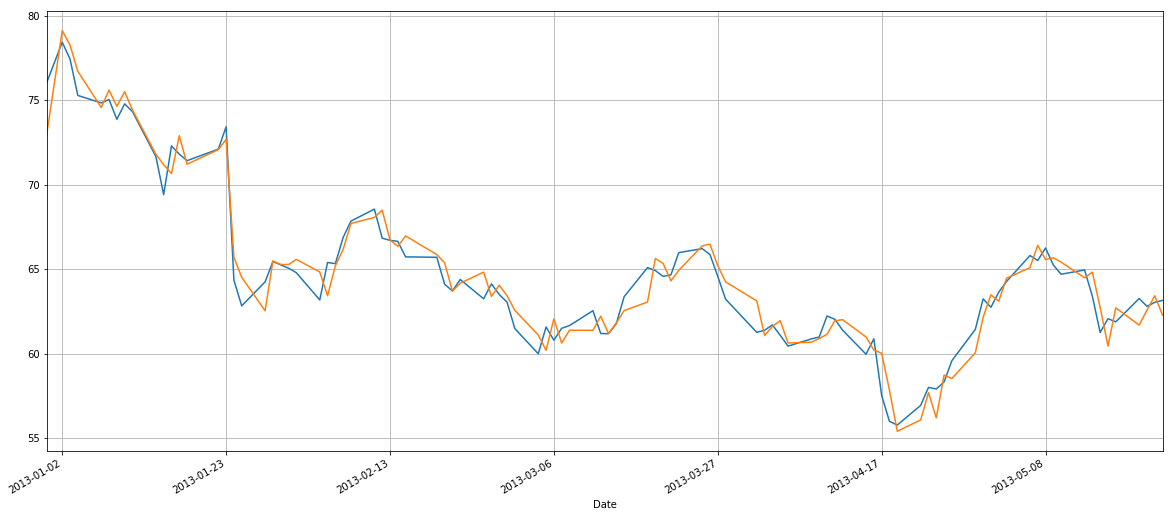

In [31]:
#we will use the first 100 record only

import matplotlib.pyplot as plt

%matplotlib inline

pylab.rcParams['figure.figsize'] = (20, 9)   # Change the size of plots

df['Close'][:100].plot(grid = True) 
df['Open'][:100].plot(grid = True) 

Task 2.10

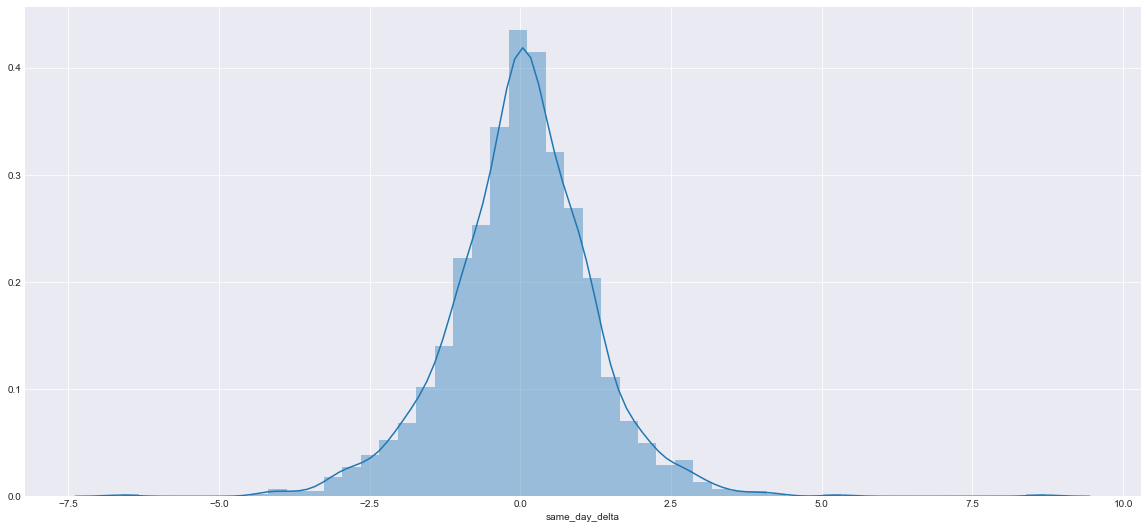

In [32]:
import seaborn as sns

sns.set_style('darkgrid')
sns.distplot(df['same_day_delta'])